In [2]:
# steps: https://github.com/lk-chen/detectron2-ResNeSt/blob/resnest/INSTALL.md

!pip3 install cython pyyaml==5.1
# !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

  Using cached https://files.pythonhosted.org/packages/81/7d/ed2dd579dffd2826d03225b55576d1bf304108c764152e41f7116f2459d8/Cython-0.29.17-cp35-cp35m-manylinux1_x86_64.whl
1.5.0+cu101 True
gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516
Copyright (C) 2016 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [13]:
!(cd detectron2-ResNeSt && python3.7 -m pip install -e .)

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/lk_chen93/cs231n_project/detectron2-ResNeSt
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached yacs-0.1.7-py3-none-any.whl (14 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
  Using cached cloudpickle-1.4.1-py3-none-any.whl (26 kB)
     |████████████████████████████████| 12.4 MB 8.7 MB/s eta 0:00:01
  Using cached tqdm-4.46.0-py2.py3-none-any.whl (63 kB)
  Using cached tensorboard-2.2.1-py3-none-any.whl (3.0 MB)
     |████████████████████████████████| 269 kB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.0 MB/s eta 0:00:01
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached six-1.14.0-py2.py3-none-any.whl (10 kB)
  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
     |████████████████████████████████| 89 kB 12.6 MB/s eta 0:00:01
     |███████

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Running setup.py develop for detectron2


In [23]:
# To be backward compatible, try_zhanghang_detectron2 always use resnest-50
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-50/' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2.sh
!bash try_zhanghang_detectron2.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_50.pth

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-50.yaml', dist_url='tcp://127.0.0.1:60904', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'output/model_final.pth'], resume=False)
[05/19 14:43:00 detectron2:104]: Rank of current process: 0. World size: 1
[05/19 14:43:00 detectron2:105]: Environment info:
------------------------  ----------------------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.7 (default, Mar 10 2020, 13:18:53) [GCC 9.2.1 20191109]
numpy                     1.18.2
detectron2                0.1.1 @/usr/local/google/home/lkchen/cs231n/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 9.2
detectron2 CUDA compiler  10.2
detectron2 arch flags     sm_52
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0 @/usr/local/google/home/lkchen/.local/lib/python3.7/site-packages/torch
PyTorc

[05/19 14:43:02 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
   

[05/19 14:43:03 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20           |    van     | 3            |   truck    | 1            |
|  pedestrian   | 0            |   person   | 6            |  cyclist   | 1            |
|     tram      | 0            |    misc    | 0            |  dontcare  | 13           |
| person_sitt.. | 0            |            |              |            |              |
|     total     | 44           |            |              |            |              |
[05/19 14:43:03 d2.data.common:88]: Serializing 10 elements to byte tensors and concatenating them all ...
[05/19 14:43:03 d2.data.common:95]: Serialized dataset takes 0.01 MiB
[05/19 14:43:03 d2.evaluation.evaluator:123]: Start inference on 10 images
[05/19 14:43:07 d2.evaluation.evaluato

In [55]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-101/' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_resnest_101.sh
!bash try_zhanghang_detectron2_resnest_101.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_101.pth

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-101.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'output/model_final.pth'], resume=False)
[05/19 16:13:29 detectron2:104]: Rank of current process: 0. World size: 1
[05/19 16:13:30 detectron2:105]: Environment info:
------------------------  ---------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.3 (default, May 18 2020, 08:41:38) [GCC 6.3.0 20170516]
numpy                     1.18.4
detectron2                0.1.1 @/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 6.3
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0+cu101 @/home/lk_chen93/.local/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available

[05/19 16:13:35 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
   

[05/19 16:13:36 d2.data.build:63]: Removed 0 images with no usable annotations. 5415 images left.
[05/19 16:13:37 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20609        |    van     | 2407         |   truck    | 965          |
|  pedestrian   | 0            |   person   | 2477         |  cyclist   | 1042         |
|     tram      | 511          |    misc    | 877          |  dontcare  | 8373         |
| person_sitt.. | 222          |            |              |            |              |
|     total     | 37483        |            |              |            |              |
[05/19 16:13:37 d2.data.common:88]: Serializing 5415 elements to byte tensors and concatenating them all ...
[05/19 16:13:37 d2.data.common:95]: Serialized dataset takes 3.53 MiB
[05/19 16:13:

[05/19 16:13:56 d2.utils.events:215]:  eta: 4:21:21  iter: 19  total_loss: 1.180  loss_cls: 0.430  loss_box_reg: 0.141  loss_rpn_cls: 0.433  loss_rpn_loc: 0.151  time: 0.8800  data_time: 0.0618  lr: 0.005000  max_mem: 14173M
[05/19 16:14:14 d2.utils.events:215]:  eta: 4:22:57  iter: 39  total_loss: 1.026  loss_cls: 0.417  loss_box_reg: 0.227  loss_rpn_cls: 0.272  loss_rpn_loc: 0.130  time: 0.8799  data_time: 0.0493  lr: 0.005000  max_mem: 14173M
[05/19 16:14:32 d2.utils.events:215]:  eta: 4:22:40  iter: 59  total_loss: 1.074  loss_cls: 0.404  loss_box_reg: 0.290  loss_rpn_cls: 0.240  loss_rpn_loc: 0.111  time: 0.8784  data_time: 0.0486  lr: 0.005000  max_mem: 14173M
[05/19 16:14:49 d2.utils.events:215]:  eta: 4:22:26  iter: 79  total_loss: 1.131  loss_cls: 0.465  loss_box_reg: 0.367  loss_rpn_cls: 0.211  loss_rpn_loc: 0.094  time: 0.8783  data_time: 0.0492  lr: 0.005000  max_mem: 14173M
[05/19 16:15:07 d2.utils.events:215]:  eta: 4:22:09  iter: 99  total_loss: 1.228  loss_cls: 0.445  l

[05/19 16:24:12 d2.utils.events:215]:  eta: 4:12:49  iter: 719  total_loss: 1.164  loss_cls: 0.406  loss_box_reg: 0.561  loss_rpn_cls: 0.102  loss_rpn_loc: 0.091  time: 0.8775  data_time: 0.0512  lr: 0.005000  max_mem: 14173M
[05/19 16:24:29 d2.utils.events:215]:  eta: 4:12:29  iter: 739  total_loss: 1.153  loss_cls: 0.411  loss_box_reg: 0.535  loss_rpn_cls: 0.103  loss_rpn_loc: 0.084  time: 0.8775  data_time: 0.0465  lr: 0.005000  max_mem: 14173M
^C
[05/19 16:24:40 d2.engine.hooks:184]: Overall training speed: 750 iterations in 0:10:58 (0.8777 s / it)
[05/19 16:24:40 d2.engine.hooks:191]: Total training time: 0:10:59 (0:00:01 on hooks)
Traceback (most recent call last):
  File "tools/train_net.py", line 163, in <module>
    args=(args,),
  File "/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2/engine/launch.py", line 52, in launch
    main_func(*args)
  File "tools/train_net.py", line 151, in main
    return trainer.train()
  File "/home/lk_chen93/cs231n_project/detectron2

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-50.yaml', dist_url='tcp://127.0.0.1:60904', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '../resnest_50.pth'], resume=False)
class names are: ['car', 'van', 'truck', 'pedestrian', 'person', 'cyclist', 'tram', 'misc', 'dontcare', 'person_sitting']
pred_classes are: tensor([0, 4, 8, 8, 0], device='cuda:0')
Human readable pred_class: ['car', 'person', 'dontcare', 'dontcare', 'car']
Boxes(tensor([[ 480.5262,  175.9620,  539.2896,  218.9235],
        [1134.4093,  136.3931, 1177.5540,  199.4329],
        [ 871.1071,  159.0412,  942.6576,  185.3418],
        [1211.1450,  139.5447, 1223.7606,  222.3465],
        [ 873.1215,  160.0978,  946.4393,  185.6082]], device='cuda:0'))
Metadata(dirname='datasets/VOC2012', evaluator_type='pascal_voc', name='voc_2012_trainval', split='trainval', thing_classes=['car', 'van', 'truck', 'pedestrian', 'person', 'cyclist', 'tram', 'misc', 'do

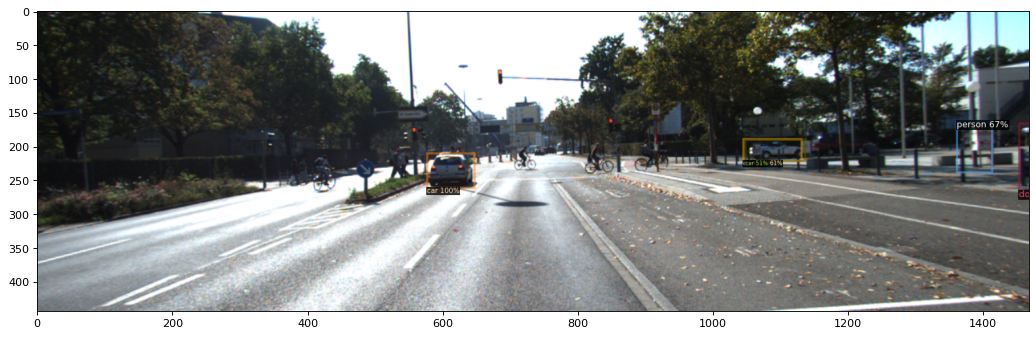

In [20]:
# Visualize
!(cd detectron2-ResNeSt/ && python3 tools/train_kitti.py \
  --config-file configs/kitti/kitti-faster-rcnn-resnest-50.yaml MODEL.WEIGHTS ../resnest_50.pth)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
img=mpimg.imread('detectron2-ResNeSt/prediction.png')
imgplot = plt.imshow(img)
plt.show()